In [13]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

plt.style.use('fivethirtyeight')

In [14]:
pip install pandas matplotlib sklearn keras numpy tensorflow


Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install yfinance --upgrade --no-cache-dir


Requirement already up-to-date: yfinance in c:\users\bobgrasses\anaconda3\lib\site-packages (0.1.63)
Note: you may need to restart the kernel to use updated packages.


In [16]:
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

In [41]:
df = pdr.get_data_yahoo('GOOGL',start='2013-01-01', end='2021-07-21')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,360.070068,363.863861,358.633636,361.987000,361.987000,5077517
2013-01-03,362.827820,366.331329,360.720734,362.197205,362.197205,4631764
2013-01-04,365.035034,371.106110,364.204193,369.354340,369.354340,5521473
2013-01-07,368.093079,370.060059,365.655670,367.742737,367.742737,3308089
2013-01-08,368.138153,368.518524,362.577576,367.017029,367.017029,3348848
...,...,...,...,...,...,...
2021-07-14,2559.159912,2586.530029,2558.290039,2564.739990,2564.739990,1187100
2021-07-15,2572.979980,2574.000000,2530.600098,2540.100098,2540.100098,1210900
2021-07-16,2553.260010,2556.229980,2523.070068,2539.399902,2539.399902,1020600


In [42]:
df.shape

(2152, 6)

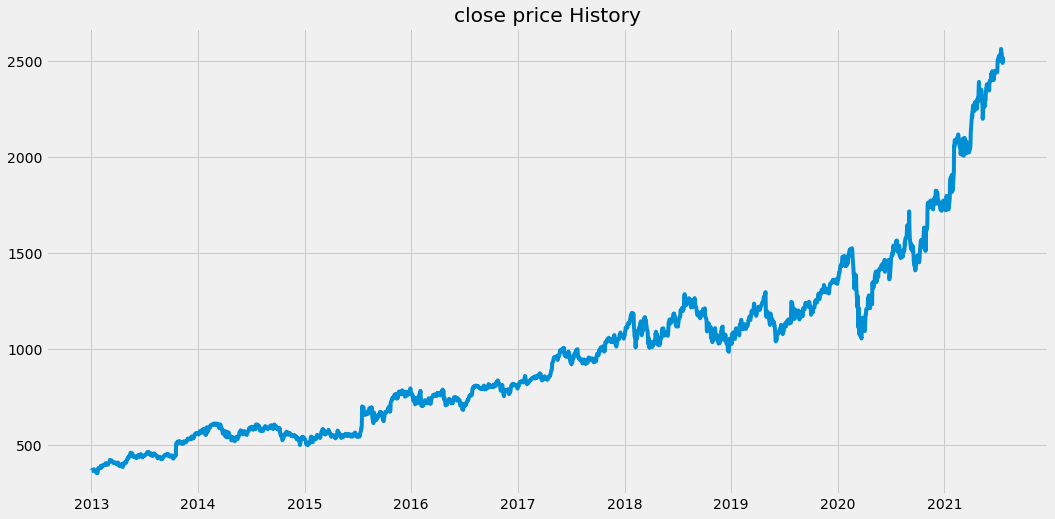

In [43]:
plt.figure(figsize=(16,8))
plt.title('close price History')
plt.plot(df['Close'])
plt.show()



In [44]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .9)
training_data_len

1937

In [45]:
scalar = MinMaxScaler(feature_range=(0,1))
scaled_data = scalar.fit_transform(dataset)
scaled_data


array([[0.00460933],
       [0.00470432],
       [0.00793852],
       ...,
       [0.9885492 ],
       [0.9669311 ],
       [0.98167605]])

In [46]:
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []


for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()
    
train_data

[array([0.00460933, 0.00470432, 0.00793852, 0.00721026, 0.00688232,
       0.00797245, 0.00873238, 0.00839538, 0.00460933, 0.00498928,
       0.0027864 , 0.00191113, 0.00037092, 0.        , 0.0087369 ,
       0.0116115 , 0.01148937, 0.01082444, 0.01149163, 0.01152556,
       0.01194624, 0.01644925, 0.01269937, 0.01421923, 0.01522115,
       0.01607607, 0.01865891, 0.01799171, 0.01760271, 0.01809122,
       0.01921302, 0.0203597 , 0.02351701, 0.02026245, 0.02095679,
       0.02190217, 0.01988023, 0.01973547, 0.021918  , 0.02223917,
       0.02336775, 0.02683039, 0.03069787, 0.02906493, 0.02934085,
       0.0290966 , 0.02984295, 0.02821227, 0.02769208, 0.02683943,
       0.02520197, 0.02372961, 0.02452799, 0.0252947 , 0.02451442,
       0.02429955, 0.02414802, 0.02477677, 0.02256936, 0.02065372])]
[0.022236904127725526]

[array([0.00460933, 0.00470432, 0.00793852, 0.00721026, 0.00688232,
       0.00797245, 0.00873238, 0.00839538, 0.00460933, 0.00498928,
       0.0027864 , 0.00191113, 0.0

array([[0.00460933],
       [0.00470432],
       [0.00793852],
       ...,
       [0.52952462],
       [0.54020266],
       [0.53063177]])

In [47]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [48]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1877, 60, 1)

In [49]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [50]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [51]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1877/1877 [==============================] - 21s 10ms/step - loss: 0.0024


In [52]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])



In [53]:
training_data_len

1937

In [54]:
x_test = np.array(x_test)

In [55]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [56]:
predictions = model.predict(x_test)
predictions = scalar.inverse_transform(predictions)

In [57]:
rmse=np.sqrt(np.mean((predictions- y_test)**2))
print(y_test.shape)
rmse

(215, 1)


82.20766763642489

<ipython-input-58-142a9e1806bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


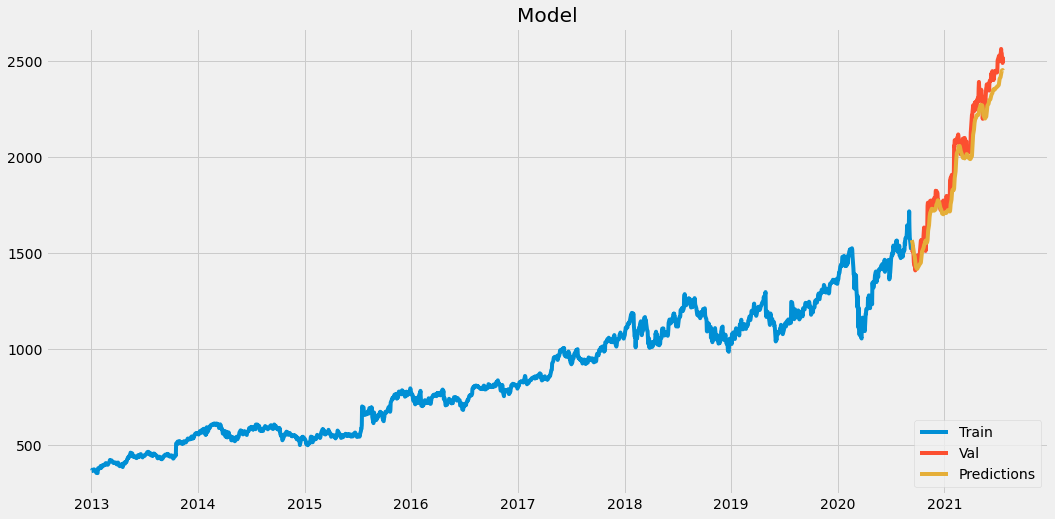

In [58]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [59]:
valid

,Close,Predictions
Date,,
2020-09-11,1515.760010,1567.551514
2020-09-14,1508.829956,1548.578979
2020-09-15,1535.119995,1530.873169
2020-09-16,1512.089966,1518.631226
2020-09-17,1487.040039,1508.191284
...,...,...
2021-07-14,2564.739990,2434.486572
2021-07-15,2540.100098,2444.506836
2021-07-16,2539.399902,2450.937012


In [60]:
google_quote =pdr.get_data_yahoo('GOOGL',data_source='yahoo', start='2013-01-01', end='2021-07-21')
new_df = google_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scalar.transform(last_60_days)

X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scalar.inverse_transform(pred_price)
print(pred_price) 

[*********************100%***********************]  1 of 1 completed
[[2448.5205]]


In [64]:
google_quote2 = pdr.get_data_yahoo('GOOGL',data_source='yahoo', start='2021-07-22', end='2021-07-23')
print(google_quote2['Close'])


[*********************100%***********************]  1 of 1 completed
Date
2021-07-22    2560.620117
Name: Close, dtype: float64
